In [69]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import GraphHelpers as GH
import ETFunctions as et

## Bring in the data needed

In [176]:
#Bring in surface temperature for each plot and join up
WheatTs = pd.concat([pd.read_pickle('.\Wheat\DataFrames\DailyTs.pkl')],axis=1,keys=['Wheat'],names=['Crop'])
BeatTs = pd.concat([pd.read_pickle('.\FodderBeat\DataFrames\DailyTs.pkl')],axis=1,keys=['Beat'],names=['Crop'])
LucerneTs = pd.read_pickle('.\LucerneAndPasture\DataFrames\LucDailyTs.pkl')
RyegrassTs = pd.read_pickle('.\LucerneAndPasture\DataFrames\RyeDailyTs.pkl')
Ts = pd.concat([WheatTs,BeatTs,LucerneTs,RyegrassTs],axis=1)
GH.SortFrame(Ts)
Ts.dropna(how='all',inplace=True)
Ts.drop_duplicates(inplace=True)


#Bring in air temperature data for each experiment
WheatTa = pd.read_pickle('.\Wheat\DataFrames\DailyTa.pkl')
BeatTa = pd.read_pickle('.\FodderBeat\DataFrames\DailyTa.pkl')
LandPTa = pd.read_pickle('.\LucerneAndPasture\DataFrames\DailyTa.pkl')
Ta = pd.concat([WheatTa,BeatTa,LandPTa])
Ta.dropna(how='all',inplace=True)
Ta.drop_duplicates(inplace=True)
GH.SortFrame(Ta)

#Bring in solar radiation data for each experiment
WheatRs = pd.read_pickle('.\Wheat\DataFrames\DailyRs.pkl')
BeatRs = pd.read_pickle('.\FodderBeat\DataFrames\DailyRs.pkl')
LandPRs = pd.read_pickle('.\LucerneAndPasture\DataFrames\DailyRs.pkl')
Rs = pd.concat([WheatRs,BeatRs,LandPRs])
Rs.dropna(how='all',inplace=True)
Rs.drop_duplicates(inplace=True)
GH.SortFrame(Rs)

#Bring in vapour pressure deficit for each experiment
WheatEd = pd.read_pickle('.\Wheat\DataFrames\DailyEd.pkl')
BeatEd = pd.read_pickle('.\FodderBeat\DataFrames\DailyEd.pkl')
LandPEd = pd.read_pickle('.\LucerneAndPasture\DataFrames\DailyEd.pkl')
Ed = pd.concat([WheatEd,BeatEd,LandPEd])
Ed.dropna(how='all',inplace=True)
Ed.drop_duplicates(inplace=True)
GH.SortFrame(Ed)

#Bring in vapour pressure for each experiment
WheatEo = pd.read_pickle('.\Wheat\DataFrames\DailyEo.pkl')
BeatEo = pd.read_pickle('.\FodderBeat\DataFrames\DailyEo.pkl')
LandPEo = pd.read_pickle('.\LucerneAndPasture\DataFrames\DailyEo.pkl')
Eo = pd.concat([WheatEo,BeatEo,LandPEo])
Eo.dropna(how='all',inplace=True)
Eo.drop_duplicates(inplace=True)
GH.SortFrame(Eo)

#Bring in net radiatin for each experiment
WheatRn = pd.concat([pd.read_pickle('.\Wheat\DataFrames\DailyRn.pkl')],axis=1,keys=['Wheat'],names=['Crop'])
BeatRn = pd.concat([pd.read_pickle('.\FodderBeat\DataFrames\DailyRn.pkl')],axis=1,keys=['Beat'],names=['Crop'])
LucRn = pd.concat([pd.read_pickle('.\LucerneAndPasture\DataFrames\LucDailyRn.pkl')],axis=1,keys=['Lucerne'],names=['Crop'])
RyeRn = pd.concat([pd.read_pickle('.\LucerneAndPasture\DataFrames\RyeDailyRn.pkl')],axis=1,keys=['Ryegrass'],names=['Crop'])
Rn = pd.concat([WheatRn,BeatRn,LucRn,RyeRn],axis=1)
Rn.dropna(how='all',inplace=True)
Rn.drop_duplicates(inplace=True)
GH.SortFrame(Rn)

#Bring in fPAR (estimated from NDVI and interpolated to daily values) for each plot
WheatfPAR = pd.concat([pd.read_pickle('.\Wheat\DataFrames\DailyfPAREstInt.pkl')],axis=1,keys=['Wheat'],names =['Crop'])
BeatfPAR = pd.concat([pd.read_pickle('.\FodderBeat\DataFrames\DailyfPAREstInt.pkl')],axis=1,keys=['Beat'],names =['Crop'])
LucernefPAR = pd.read_pickle('.\LucerneAndPasture\DataFrames\LucDailyfPAREstInt.pkl')
RyegrassfPAR = pd.read_pickle('.\LucerneAndPasture\DataFrames\RyeDailyfPAREstInt.pkl')
fPAR = pd.concat([WheatfPAR,BeatfPAR,LucernefPAR,RyegrassfPAR],axis=1)
fPAR.dropna(how='all',inplace=True)
fPAR.drop_duplicates(inplace=True)
GH.SortFrame(fPAR)

#Bring in soil water use data.
WheatWU = pd.concat([pd.read_pickle('.\Wheat\DataFrames\DailyWU.pkl')],axis=1,keys=['Wheat'],names =['Crop'])
BeatWU = pd.concat([pd.read_pickle('.\FodderBeat\DataFrames\DailyWU.pkl')],axis=1,keys=['Beat'],names =['Crop'])
LucWU = pd.read_pickle('.\LucerneAndPasture\DataFrames\LucDailyWU.pkl')
RyeWU = pd.read_pickle('.\LucerneAndPasture\DataFrames\RyeDailyWU.pkl')
WU = pd.concat([WheatWU,BeatWU,LucWU,RyeWU],axis=1)
WU.dropna(how='all',inplace=True)
WU.drop_duplicates(inplace=True)
GH.SortFrame(WU)

In [177]:
FirstUnion = list(set(Ts.index).intersection(Ta.index))
SecondUnion = list(set(FirstUnion).intersection(Rs.index))
ThirdUnion = list(set(SecondUnion).intersection(Ed.index))
ForthUnion = list(set(ThirdUnion).intersection(Eo.index))
FifthUnion = list(set(ForthUnion).intersection(Rn.index))
SixthUnion = list(set(FifthUnion).intersection(fPAR.index))
CommonDates = SixthUnion
CommonDates.sort()

In [187]:
Ts.Beat

Irrigation    Dryland                                                         \
Nitrogen            0                                         300              
Block               1          2          3          4          1          2   
2012-08-30        NaN        NaN        NaN        NaN        NaN        NaN   
2012-08-31        NaN        NaN        NaN        NaN        NaN        NaN   
2012-09-01        NaN        NaN        NaN        NaN        NaN        NaN   
2012-09-02        NaN        NaN        NaN        NaN        NaN        NaN   
2012-09-03        NaN        NaN        NaN        NaN        NaN        NaN   
2012-09-04        NaN        NaN        NaN        NaN        NaN        NaN   
2012-09-05        NaN        NaN        NaN        NaN        NaN        NaN   
2012-09-06        NaN        NaN        NaN        NaN        NaN        NaN   
2012-09-07        NaN        NaN        NaN        NaN        NaN        NaN   
2012-09-08        NaN        NaN        NaN        NaN        NaN        NaN   
2012-09-09        NaN        NaN        NaN        NaN        NaN        NaN   
2012-09-10        NaN        NaN        NaN        NaN        NaN        NaN   
2012-09-11        NaN        NaN        NaN        NaN        NaN        NaN   
2012-09-12        NaN        NaN        NaN        NaN        NaN        NaN   
2012-09-13        NaN        NaN        NaN        NaN        NaN        NaN   
2012-09-14        NaN        NaN        NaN        NaN        NaN        NaN   
2012-09-15        NaN        NaN        NaN        NaN        NaN        NaN   
2012-09-16        NaN        NaN        NaN        NaN        NaN        NaN   
2012-09-17        NaN        NaN        NaN        NaN        NaN        NaN   
2012-09-18        NaN        NaN        NaN        NaN        NaN        NaN   
2012-09-19        NaN        NaN        NaN        NaN        NaN        NaN   
2012-09-20        NaN        NaN        NaN        NaN        NaN        NaN   
2012-09-21        NaN        NaN        NaN        NaN        NaN        NaN   
2012-09-22        NaN        NaN        NaN        NaN        NaN        NaN   
2012-09-23        NaN        NaN        NaN        NaN        NaN        NaN   
2012-09-24        NaN        NaN        NaN        NaN        NaN        NaN   
2012-09-25        NaN        NaN        NaN        NaN        NaN        NaN   
2012-09-26        NaN        NaN        NaN        NaN        NaN        NaN   
2012-09-27        NaN        NaN        NaN        NaN        NaN        NaN   
2012-09-28        NaN        NaN        NaN        NaN        NaN        NaN   
...               ...        ...        ...        ...        ...        ...   
2017-04-17  14.776230  14.822951  14.563115  14.480197  14.092131  14.467377   
2017-04-18  14.569983  14.602900  14.381800  14.238300  13.719917  14.179533   
2017-04-19  17.586393  17.380098  17.213213  16.882885  16.587984  17.182656   
2017-04-20  15.071459  14.920607  14.954754  14.687721  14.306656  14.849246   
2017-04-21  16.609820  16.212984  16.336492  15.912344  15.812557  16.021689   
2017-04-22  17.453984  17.059033  17.099082  16.670967  16.580787  16.871279   
2017-04-23  18.201279  17.908246  17.885574  17.375934  17.239885  17.684377   
2017-04-24  16.849828  16.582759  16.567069  16.032069  15.722586  16.190862   
2017-04-25  16.360667  16.008000  16.068833  15.702000  15.536500  15.664833   
2017-04-26  15.841000  15.655000  15.636667  15.275500  15.163167  15.271833   
2017-04-27  17.300500  17.040233  16.972350  16.654017  16.676800  16.804533   
2017-04-28  21.115517  21.047586  20.856724  20.774828  20.604828  20.874310   
2017-04-29  16.130339  15.660169  15.713729  15.271864  15.465593  15.410508   
2017-04-30  10.665881  10.630814  10.548424  10.317610  10.387424  10.661102   
2017-05-01  12.679948  12.471448  12.469086  11.901276  11.629534  12.027224   
2017-05-02  13.085220  12.719441  12.796542  12.392949  12.502763  12.550814   


In [189]:
Ts.loc[:,['Lucerne','Ryegrass']]

Crop          Lucerne                                                         \
Irrigation        Dry                                        High              
Nitrogen            0                                           0              
Block               1          2          3          4          1          3   
2012-08-30  13.760027  13.228541  14.782739  13.877270  14.401495  15.272153   
2012-08-31  12.609217  12.307070  13.533550  12.859326  13.135070  13.937605   
2012-09-01  12.583433  12.501339  13.223756  12.525008  13.167409  13.463157   
2012-09-02  12.754762  12.547460  12.867540  12.674048  12.981190  13.139365   
2012-09-03  10.581787  10.433992  10.738008  10.437024  10.898654  11.000969   
2012-09-04  13.545349  13.223798  14.343566  13.428217  14.575426  14.989302   
2012-09-05  13.213785  12.855577  13.542362  13.141977  13.692062  13.957777   
2012-09-06  15.701395  15.420620  16.072481  15.632868  16.005504  16.455969   
2012-09-07  17.182880  16.929586  17.895910  17.449120  17.898338  18.309970   
2012-09-08  14.183864  13.977424  14.820152  14.219015  14.689470  15.264242   
2012-09-09  12.369674  12.202259  13.167770  12.259985  13.143319  13.785074   
2012-09-10  12.764358  12.542754  13.660291  12.964507  13.524351  14.206522   
2012-09-11   8.010970   7.767701   8.581209   7.969948   8.414918   8.950716   
2012-09-12   7.911730   7.643796   8.283825   7.795949   8.526752   8.821489   
2012-09-13  10.356401   9.947285  11.151759  10.935066  11.484766  12.263066   
2012-09-14  12.339110  12.037515  12.954235  12.600096  12.746882  13.566287   
2012-09-15  10.321468  10.311079  10.429288  10.166381  10.600561  10.658151   
2012-09-16  12.075393  11.886889  12.567430  11.781444  13.167911  13.222481   
2012-09-17  11.976541  11.832418  12.726566  11.916648  13.111689  13.373033   
2012-09-18  10.622064  10.264050  11.683050  11.001156  12.182745  12.866851   
2012-09-19  11.285070  10.980873  12.093049  11.378197  12.740197  12.949479   
2012-09-20   8.654291   8.408766   8.925333   8.170624   9.575411   9.527986   
2012-09-21  10.708546  10.574518  11.591865  10.844695  12.337085  12.647475   
2012-09-22  12.281768  11.947070  13.299077  12.648951  14.024634  14.450493   
2012-09-23  11.378292  11.136875  12.280444  11.560708  13.044208  13.213778   
2012-09-24  11.346042  11.110636  12.413140  11.802056  12.873266  13.441874   
2012-09-25  15.351531  15.267776  16.209657  15.806357  16.782126  17.100944   
2012-09-26  11.692076  11.575834  11.917428  11.825724  12.025117  12.142228   
2012-09-27  12.466808  12.447205  12.822801  12.242014  13.809096  13.568692   
2012-09-28  13.315555  13.175212  14.489541  14.123301  14.727281  15.337548   
...               ...        ...        ...        ...        ...        ...   
2017-04-17        NaN        NaN        NaN        NaN        NaN        NaN   
2017-04-18        NaN        NaN        NaN        NaN        NaN        NaN   
2017-04-19        NaN        NaN        NaN        NaN        NaN        NaN   
2017-04-20        NaN        NaN        NaN        NaN        NaN        NaN   
2017-04-21        NaN        NaN        NaN        NaN        NaN        NaN   
2017-04-22        NaN        NaN        NaN        NaN        NaN        NaN   
2017-04-23        NaN        NaN        NaN        NaN        NaN        NaN   
2017-04-24        NaN        NaN        NaN        NaN        NaN        NaN   
2017-04-25        NaN        NaN        NaN        NaN        NaN        NaN   
2017-04-26        NaN        NaN        NaN        NaN        NaN        NaN   
2017-04-27        NaN        NaN        NaN        NaN        NaN        NaN   
2017-04-28        NaN        NaN        NaN        NaN        NaN        NaN   
2017-04-29        NaN        NaN        NaN        NaN        NaN        NaN   
2017-04-30        NaN        NaN        NaN        NaN        NaN        NaN   
2017-05-01        NaN        NaN        NaN        NaN        NaN        NaN   


In [178]:
Crops = Ts.columns.get_level_values(0).drop_duplicates().values
WheatGPs = GH.SetGraphicsPatterns(Ts.Wheat.columns,
                    ['-','--'],
                    [0.15,0.45],
                    ['o','^'],
                    ['orange','green','purple'])

BeatGPs = GH.SetGraphicsPatterns(Ts.Beat.columns,
                    ['-','--'],
                    [0.15,0.45],
                    ['o','^'],
                    ['orange','green','purple'])

LandPGPs = GH.SetGraphicsPatterns(Ts.loc[:,['Lucerne','Ryegrass']].columns,
                    ['-','--'],
                    [0.15,0.45],
                    ['o','^'],
                    ['red','blue','green','orange'])

Irrigation
['Dryland', 'Irrigated']
Nitrogen
['0', '250', '50']
Treatments
MultiIndex(levels=[['Dryland', 'Irrigated'], ['0', '250', '50']],
           labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]])
Styles
[('-', 'orange', 0.15, 'o'), ('-', 'green', 0.15, 'o'), ('-', 'purple', 0.15, 'o'), ('--', 'orange', 0.45, '^'), ('--', 'green', 0.45, '^'), ('--', 'purple', 0.45, '^')]
StyleFrame
              Lin     Col   Alp Mar     MFC
Dryland   0     -  orange  0.15   o  orange
          250   -   green  0.15   o   green
          50    -  purple  0.15   o  purple
Irrigated 0    --  orange  0.45   ^   white
          250  --   green  0.45   ^   white
          50   --  purple  0.45   ^   white
Irrigation
['Dryland', 'Irrigated']
Nitrogen
['0', '300', '50']
Treatments
MultiIndex(levels=[['Dryland', 'Irrigated'], ['0', '300', '50']],
           labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]])
Styles
[('-', 'orange', 0.15, 'o'), ('-', 'green', 0.15, 'o'), ('-', 'purple', 0.15, 'o'), ('--', 'ora

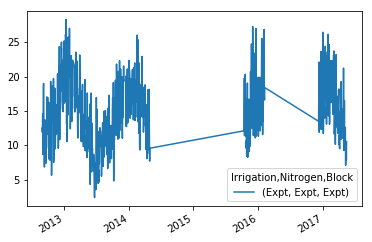

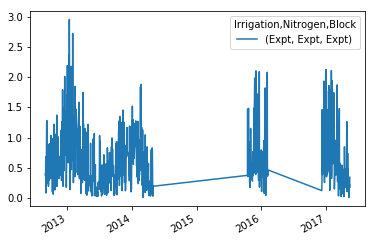

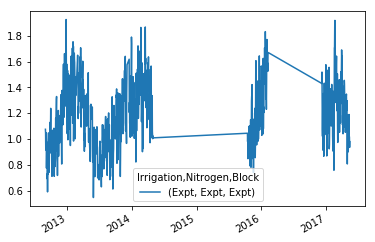

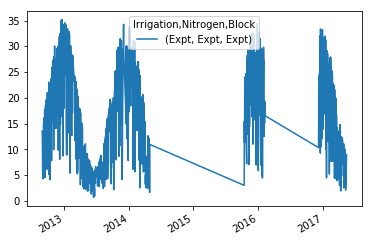

In [180]:
Ta.loc[CommonDates,:].plot()
Ed.loc[CommonDates,:].plot()
Eo.loc[CommonDates,:].plot()
Rs.loc[CommonDates,:].plot()

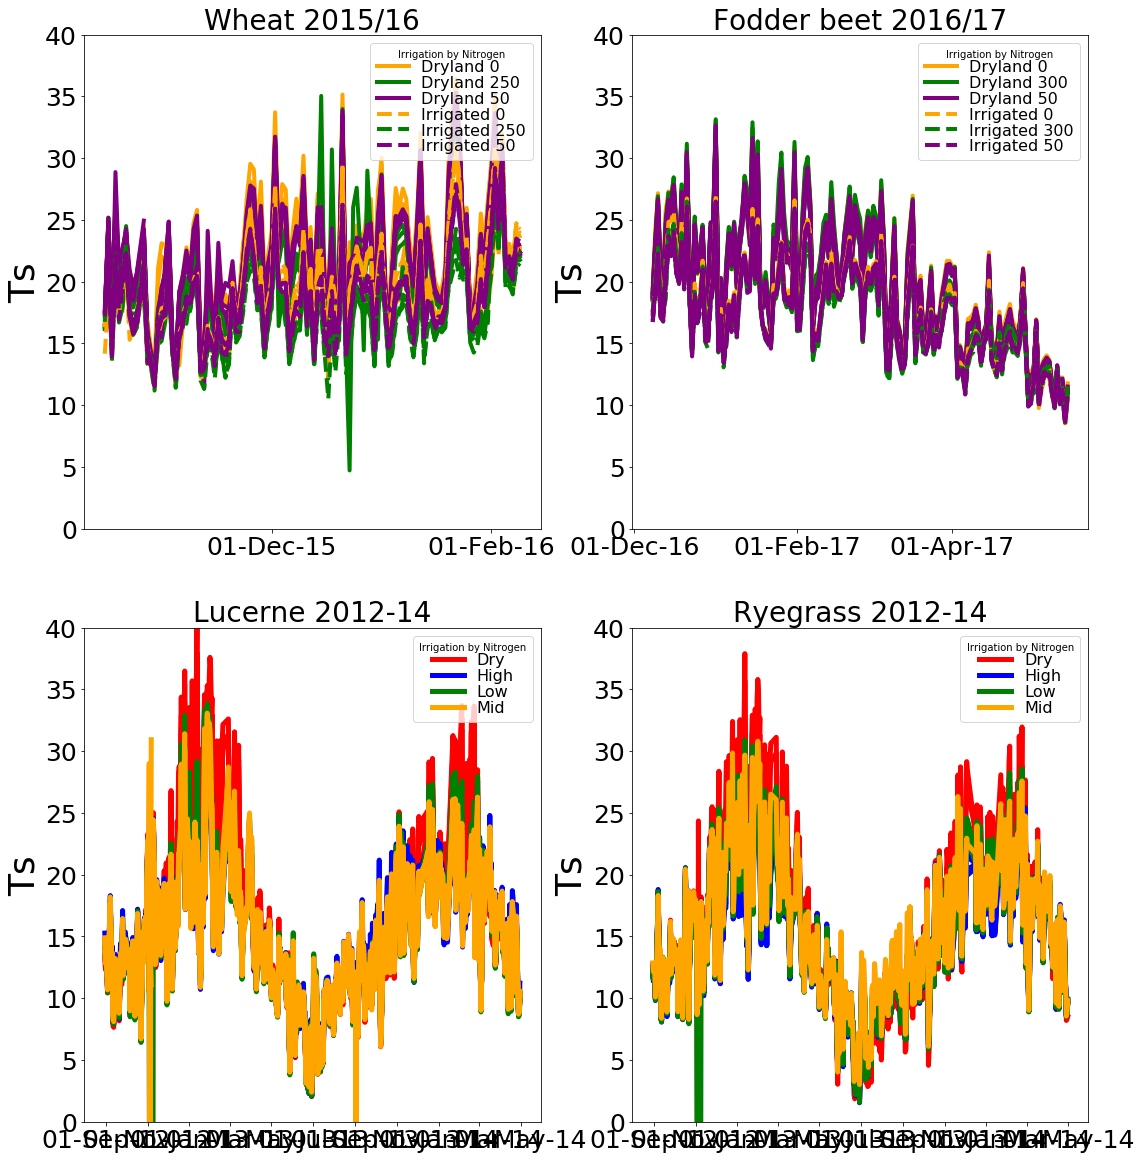

In [181]:
def AddGraphFeatures(Name):
    plt.ylabel('Ts', fontsize=36);
    plt.ylim(0,40)
    plt.tick_params(labelsize=25)
    plt.title(Name, fontsize=28);
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
    labels, handles = GH.DedupLegendElements()
    ledg = plt.legend(labels, handles,loc=1,numpoints=1,fontsize = 16,labelspacing = 0.05, 
                              title='Irrigation by Nitrogen')


Graph = plt.figure(figsize=(18,20))

ax = Graph.add_subplot(2,2,1)
GH.AddIndexedPlot(Ts.loc[CommonDates,'Wheat'],ax,WheatGPs,4)
AddGraphFeatures('Wheat 2015/16')

ax = Graph.add_subplot(2,2,2)
GH.AddIndexedPlot(Ts.loc[CommonDates,'Beat'],ax,BeatGPs,4)
AddGraphFeatures('Fodder beet 2016/17')

ax = Graph.add_subplot(2,2,3)
GH.AddIndexedPlotSingleLevel(Ts.loc[CommonDates,'Lucerne'],ax,LandPGPs,5)
AddGraphFeatures('Lucerne 2012-14')

ax = Graph.add_subplot(2,2,4)
GH.AddIndexedPlotSingleLevel(Ts.loc[CommonDates,'Ryegrass'],ax,LandPGPs,5)
AddGraphFeatures('Ryegrass 2012-14')

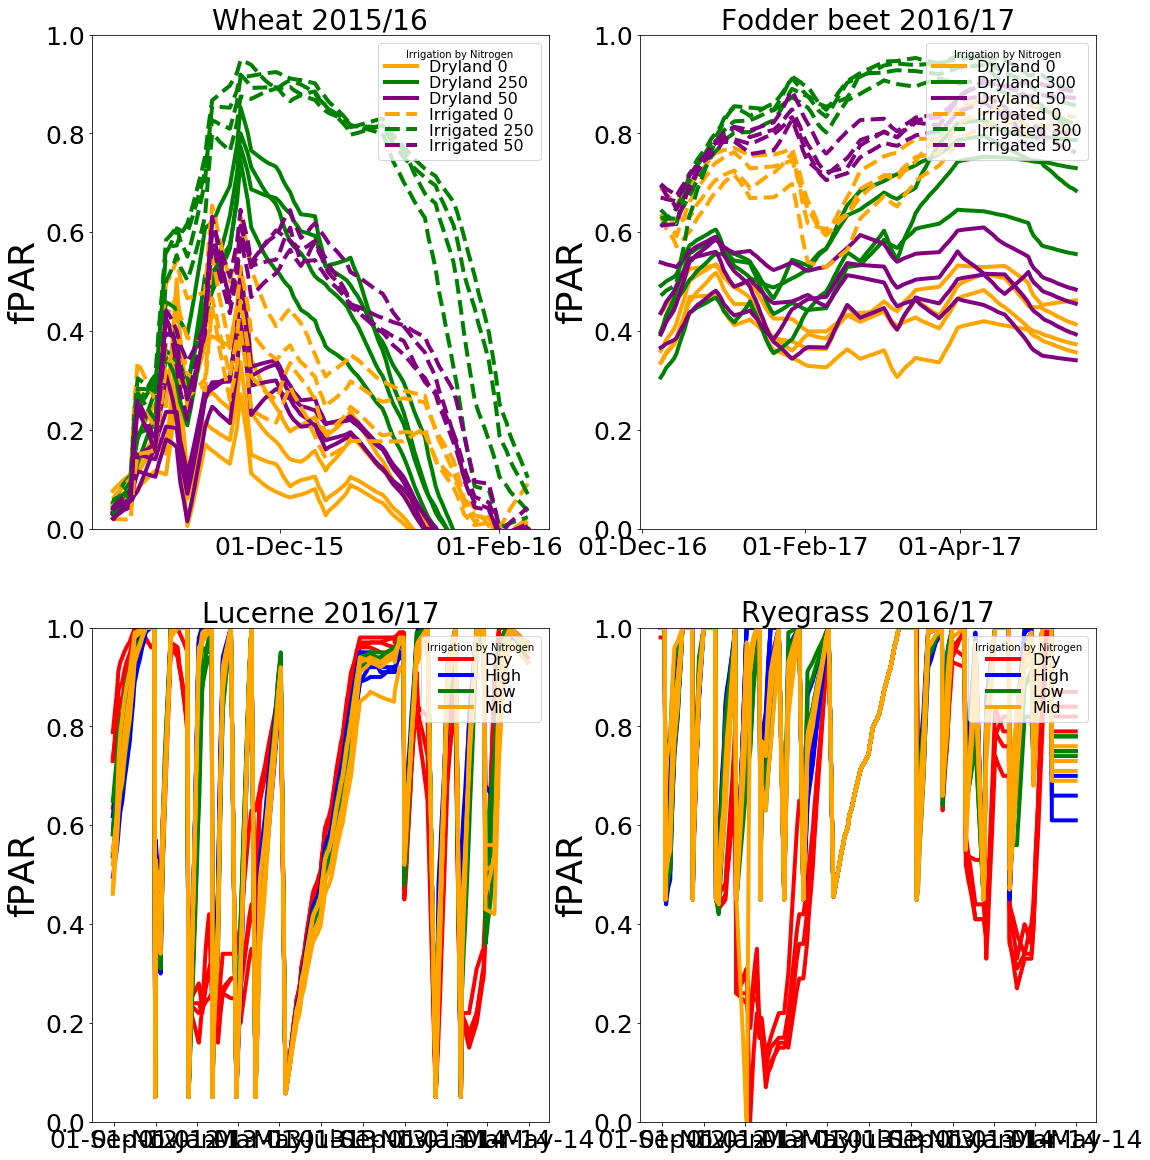

In [182]:
def AddGraphFeatures(Name):
    plt.ylabel('fPAR', fontsize=36);
    plt.ylim(0,1)
    plt.tick_params(labelsize=25)
    plt.title(Name, fontsize=28);
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
    labels, handles = GH.DedupLegendElements()
    ledg = plt.legend(labels, handles,loc=1,numpoints=1,fontsize = 16,labelspacing = 0.05, 
                              title='Irrigation by Nitrogen')


Graph = plt.figure(figsize=(18,20))

ax = Graph.add_subplot(2,2,1)
GH.AddIndexedPlot(fPAR.loc[CommonDates,'Wheat'],ax,WheatGPs,4)
AddGraphFeatures('Wheat 2015/16')

ax = Graph.add_subplot(2,2,2)
GH.AddIndexedPlot(fPAR.loc[CommonDates,'Beat'],ax,BeatGPs,4)
AddGraphFeatures('Fodder beet 2016/17')

ax = Graph.add_subplot(2,2,3)
GH.AddIndexedPlotSingleLevel(fPAR.loc[CommonDates,'Lucerne'],ax,LandPGPs,4)
AddGraphFeatures('Lucerne 2016/17')

ax = Graph.add_subplot(2,2,4)
GH.AddIndexedPlotSingleLevel(fPAR.loc[CommonDates,'Ryegrass'],ax,LandPGPs,4)
AddGraphFeatures('Ryegrass 2016/17')

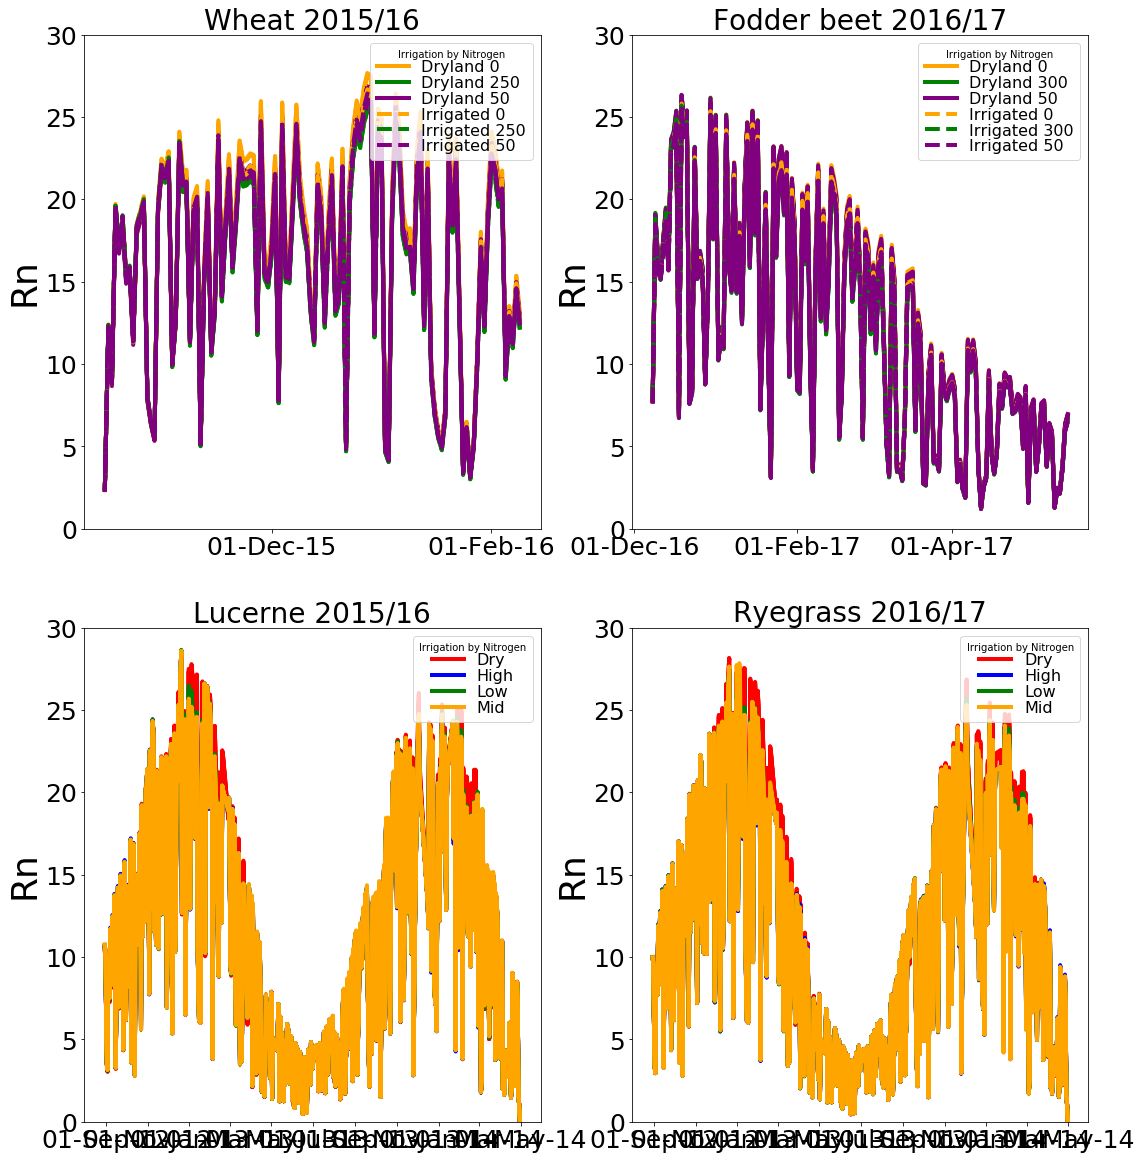

In [183]:
def AddGraphFeatures(Name):
    plt.ylabel('Rn', fontsize=36);
    plt.ylim(0,30)
    plt.tick_params(labelsize=25)
    plt.title(Name, fontsize=28);
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
    labels, handles = GH.DedupLegendElements()
    ledg = plt.legend(labels, handles,loc=1,numpoints=1,fontsize = 16,labelspacing = 0.05, 
                              title='Irrigation by Nitrogen')


Graph = plt.figure(figsize=(18,20))

ax = Graph.add_subplot(2,2,1)
GH.AddIndexedPlot(Rn.loc[CommonDates,'Wheat'],ax,WheatGPs,4)
AddGraphFeatures('Wheat 2015/16')

ax = Graph.add_subplot(2,2,2)
GH.AddIndexedPlot(Rn.loc[CommonDates,'Beat'],ax,BeatGPs,4)
AddGraphFeatures('Fodder beet 2016/17')

ax = Graph.add_subplot(2,2,3)
GH.AddIndexedPlotSingleLevel(Rn.loc[CommonDates,'Lucerne'],ax,LandPGPs,4)
AddGraphFeatures('Lucerne 2015/16')

ax = Graph.add_subplot(2,2,4)
GH.AddIndexedPlotSingleLevel(Rn.loc[CommonDates,'Ryegrass'],ax,LandPGPs,4)
AddGraphFeatures('Ryegrass 2016/17')

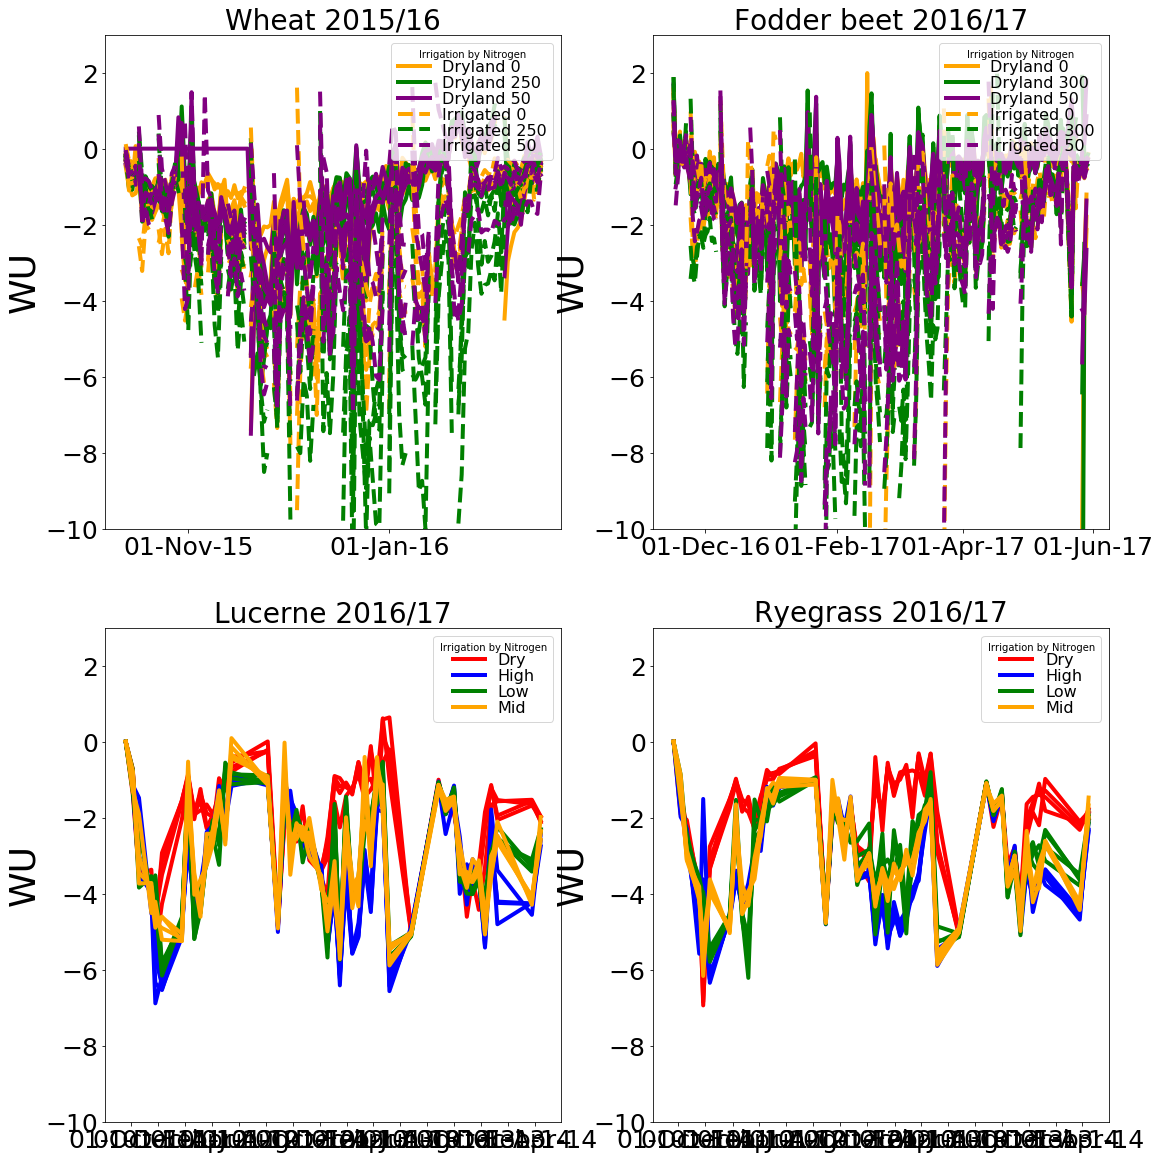

In [184]:
def AddGraphFeatures(Name):
    plt.ylabel('WU',fontsize=36);
    plt.ylim(-10,3)
    plt.tick_params(labelsize=25)
    plt.title(Name, fontsize=28);
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
    labels, handles = GH.DedupLegendElements()
    ledg = plt.legend(labels, handles,loc=1,numpoints=1,fontsize = 16,labelspacing = 0.05, 
                              title='Irrigation by Nitrogen')

Graph = plt.figure(figsize=(18,20))

ax = Graph.add_subplot(2,2,1)
GH.AddIndexedPlot(WU.loc[:,'Wheat'],ax,WheatGPs,4)
AddGraphFeatures('Wheat 2015/16')

ax = Graph.add_subplot(2,2,2)
GH.AddIndexedPlot(WU.loc[:,'Beat'],ax,BeatGPs,4)
AddGraphFeatures('Fodder beet 2016/17')

ax = Graph.add_subplot(2,2,3)
GH.AddIndexedPlotSingleLevel(-WU.loc[:,'Lucerne'],ax,LandPGPs,4)
AddGraphFeatures('Lucerne 2016/17')

ax = Graph.add_subplot(2,2,4)
GH.AddIndexedPlotSingleLevel(-WU.loc[:,'Ryegrass'],ax,LandPGPs,4)
AddGraphFeatures('Ryegrass 2016/17')

In [186]:
#Calculate aerodynamic temperature
To = pd.DataFrame(index = CommonDates,columns=Ts.columns)
for plot in To.columns:
    To.loc[:,plot] = Ts.loc[CommonDates,plot] + Ed.loc[CommonDates,('Expt','Expt','Expt')].values
    
#Calculate temperature difference
Td = pd.DataFrame(index = CommonDates,columns=Ts.columns)
for plot in Td.columns:
    Td.loc[:,plot] = To.loc[CommonDates,plot] - Ta.loc[CommonDates,('Expt','Expt','Expt')].values
    
#Calculate alpha
def AlphaCoeff(Td,fPAR):
    CoverFact = 0.1+1.6*fPAR
    if CoverFact > 1.0:
        CoverFact = 1.0
    return 1/(0.68 + 0.18*Td ) * CoverFact

Alpha = pd.DataFrame(index = CommonDates,columns=Ts.columns)
for plot in Alpha.columns:
    Alpha.loc[:,plot] = [AlphaCoeff(Td.loc[x,plot],
                                   fPAR.loc[x,plot]) for x in Alpha.index]

def estGDay(SoilRadn, AirTemp):
    Const = -0.7091
    SoilRadEff = np.multiply(SoilRadn.values,0.2149)
    AirTempEff = np.multiply(AirTemp.values,0.0736)
    return Const + SoilRadEff  + AirTempEff 

#Calculate G for each plot
G = pd.DataFrame(index=CommonDates, columns=Ts.columns)
for plot in G.columns:
    G.loc[:,plot] = estGDay(Rs.loc[CommonDates,('Expt','Expt','Expt')] * (1-fPAR.loc[CommonDates,plot]),
                            Ta.loc[CommonDates,('Expt','Expt','Expt')])
RnLessG = Rn - G

#Estimate Water Use by surfaces 
E = pd.DataFrame(index = CommonDates,columns=Ts.columns)
for plot in E.columns:
    E.loc[:,plot] = [et.Priestly_TaylorEO(RnLessG.loc[x,plot],
                                         Ta.loc[x,('Expt','Expt','Expt')],
                                         Alpha.loc[x,plot],
                                         'net') for x in E.index]

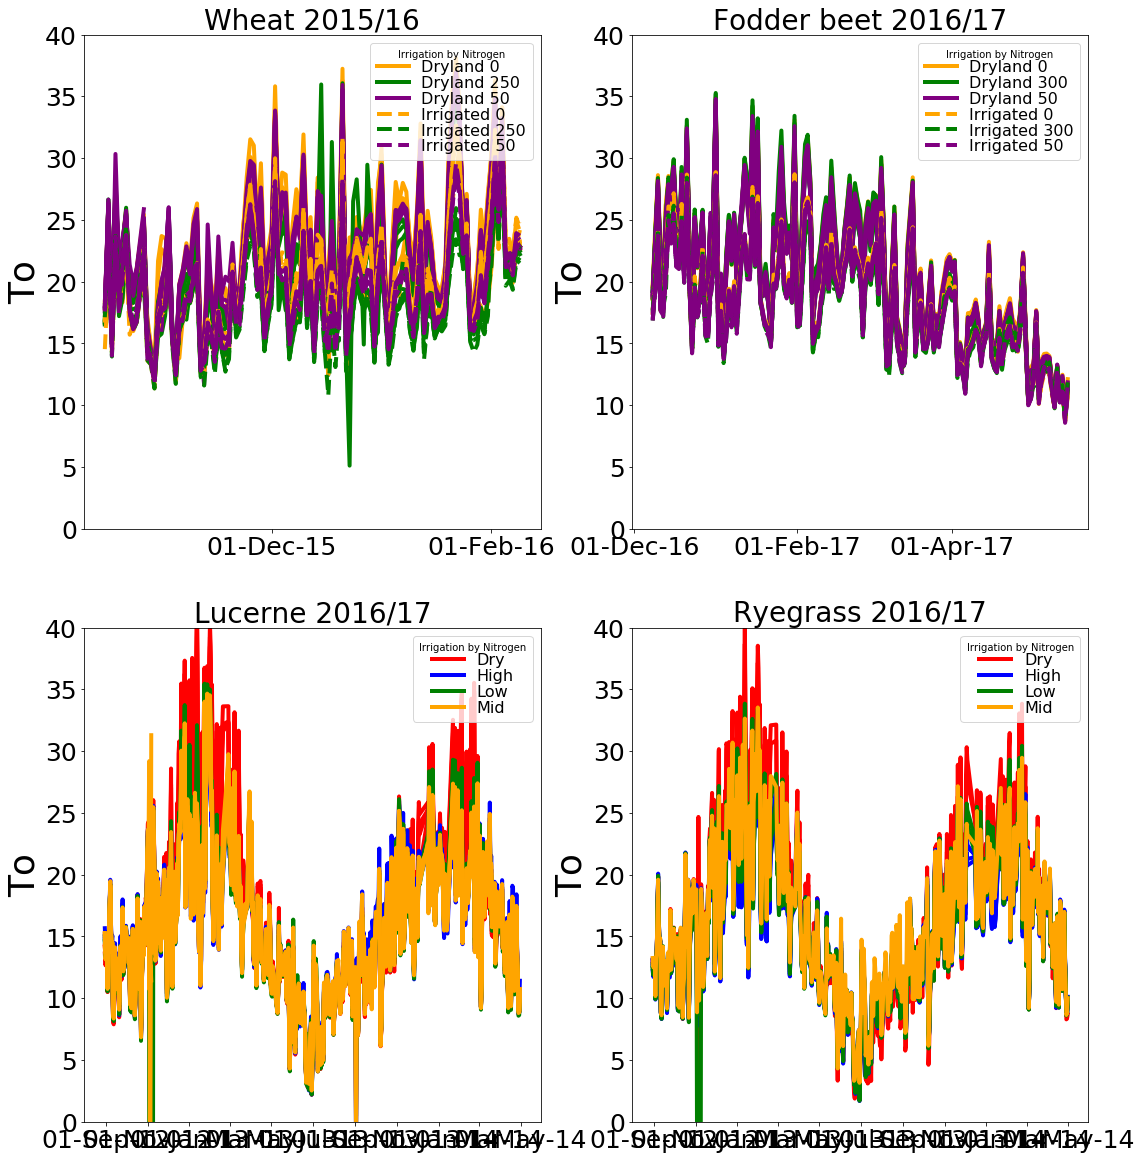

In [193]:
def AddGraphFeatures(Name):
    plt.ylabel('To',fontsize=36);
    plt.ylim(0,40)
    plt.tick_params(labelsize=25)
    plt.title(Name, fontsize=28);
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
    labels, handles = GH.DedupLegendElements()
    ledg = plt.legend(labels, handles,loc=1,numpoints=1,fontsize = 16,labelspacing = 0.05, 
                              title='Irrigation by Nitrogen')

Graph = plt.figure(figsize=(18,20))

ax = Graph.add_subplot(2,2,1)
GH.AddIndexedPlot(To.loc[:,'Wheat'],ax,WheatGPs,4)
AddGraphFeatures('Wheat 2015/16')

ax = Graph.add_subplot(2,2,2)
GH.AddIndexedPlot(To.loc[:,'Beat'],ax,BeatGPs,4)
AddGraphFeatures('Fodder beet 2016/17')

ax = Graph.add_subplot(2,2,3)
GH.AddIndexedPlotSingleLevel(To.loc[:,'Lucerne'],ax,LandPGPs,4)
AddGraphFeatures('Lucerne 2016/17')

ax = Graph.add_subplot(2,2,4)
GH.AddIndexedPlotSingleLevel(To.loc[:,'Ryegrass'],ax,LandPGPs,4)
AddGraphFeatures('Ryegrass 2016/17')

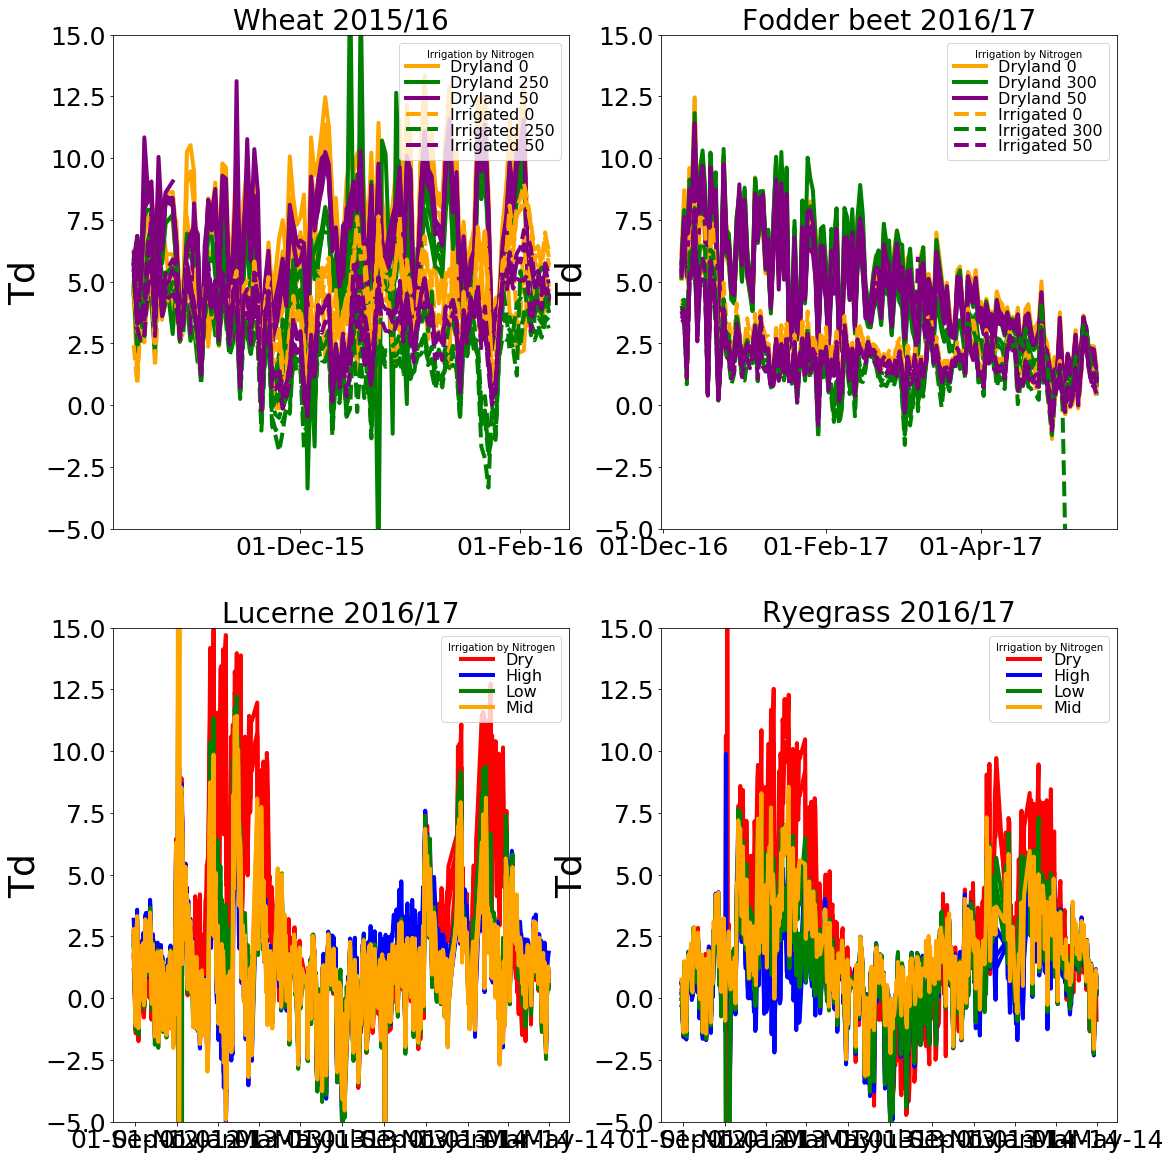

In [195]:
def AddGraphFeatures(Name):
    plt.ylabel('Td',fontsize=36);
    plt.ylim(-5,15)
    plt.tick_params(labelsize=25)
    plt.title(Name, fontsize=28);
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
    labels, handles = GH.DedupLegendElements()
    ledg = plt.legend(labels, handles,loc=1,numpoints=1,fontsize = 16,labelspacing = 0.05, 
                              title='Irrigation by Nitrogen')

Graph = plt.figure(figsize=(18,20))

ax = Graph.add_subplot(2,2,1)
GH.AddIndexedPlot(Td.loc[:,'Wheat'],ax,WheatGPs,4)
AddGraphFeatures('Wheat 2015/16')

ax = Graph.add_subplot(2,2,2)
GH.AddIndexedPlot(Td.loc[:,'Beat'],ax,BeatGPs,4)
AddGraphFeatures('Fodder beet 2016/17')

ax = Graph.add_subplot(2,2,3)
GH.AddIndexedPlotSingleLevel(Td.loc[:,'Lucerne'],ax,LandPGPs,4)
AddGraphFeatures('Lucerne 2016/17')

ax = Graph.add_subplot(2,2,4)
GH.AddIndexedPlotSingleLevel(Td.loc[:,'Ryegrass'],ax,LandPGPs,4)
AddGraphFeatures('Ryegrass 2016/17')

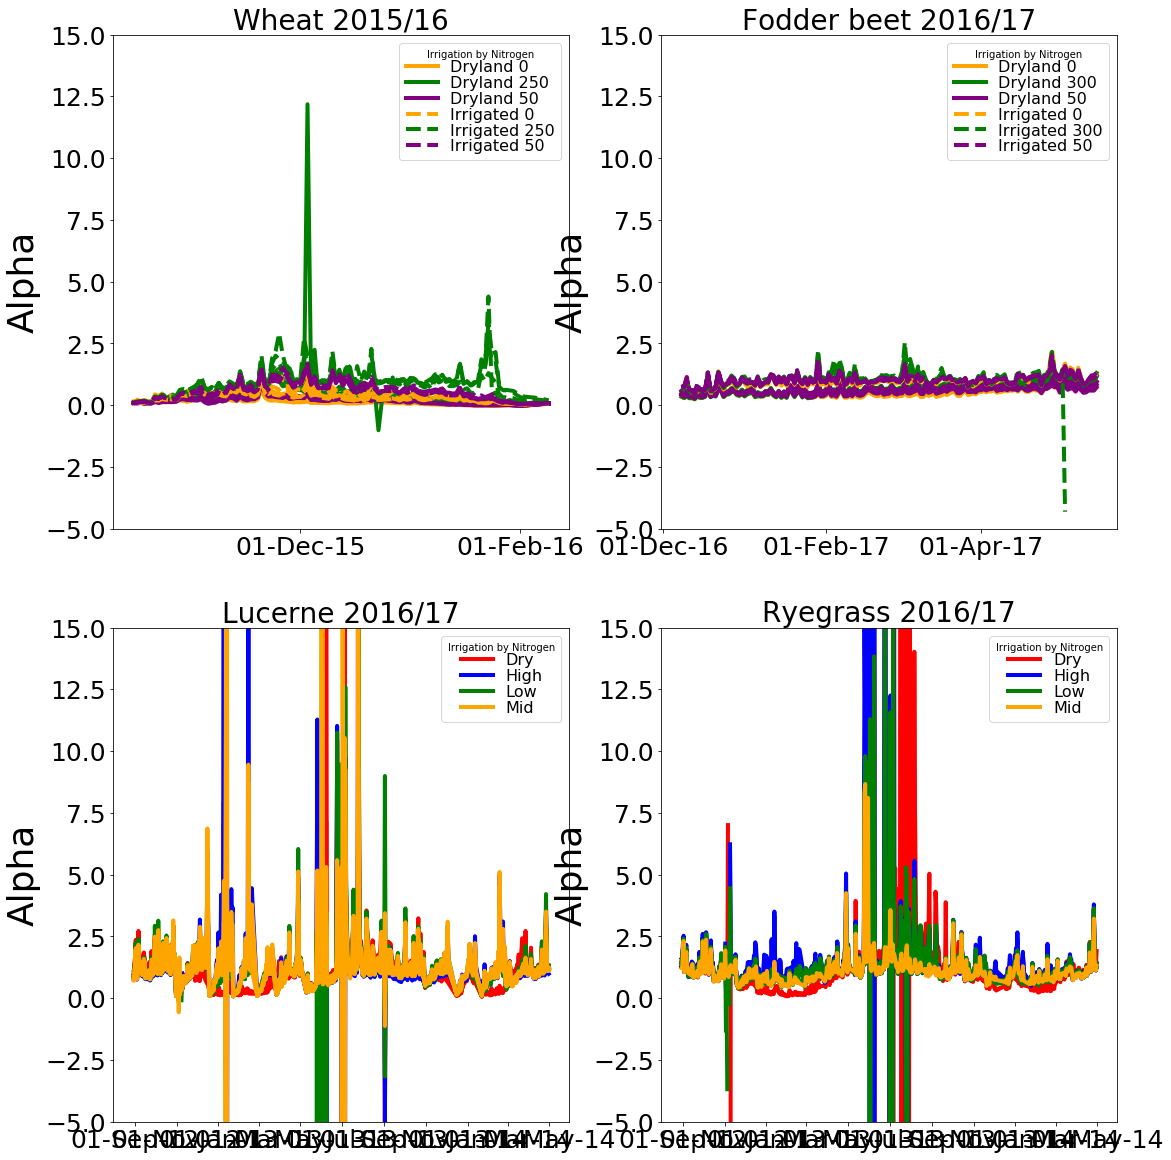

In [196]:
def AddGraphFeatures(Name):
    plt.ylabel('Alpha',fontsize=36);
    plt.ylim(-5,15)
    plt.tick_params(labelsize=25)
    plt.title(Name, fontsize=28);
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
    labels, handles = GH.DedupLegendElements()
    ledg = plt.legend(labels, handles,loc=1,numpoints=1,fontsize = 16,labelspacing = 0.05, 
                              title='Irrigation by Nitrogen')

Graph = plt.figure(figsize=(18,20))

ax = Graph.add_subplot(2,2,1)
GH.AddIndexedPlot(Alpha.loc[:,'Wheat'],ax,WheatGPs,4)
AddGraphFeatures('Wheat 2015/16')

ax = Graph.add_subplot(2,2,2)
GH.AddIndexedPlot(Alpha.loc[:,'Beat'],ax,BeatGPs,4)
AddGraphFeatures('Fodder beet 2016/17')

ax = Graph.add_subplot(2,2,3)
GH.AddIndexedPlotSingleLevel(Alpha.loc[:,'Lucerne'],ax,LandPGPs,4)
AddGraphFeatures('Lucerne 2016/17')

ax = Graph.add_subplot(2,2,4)
GH.AddIndexedPlotSingleLevel(Alpha.loc[:,'Ryegrass'],ax,LandPGPs,4)
AddGraphFeatures('Ryegrass 2016/17')

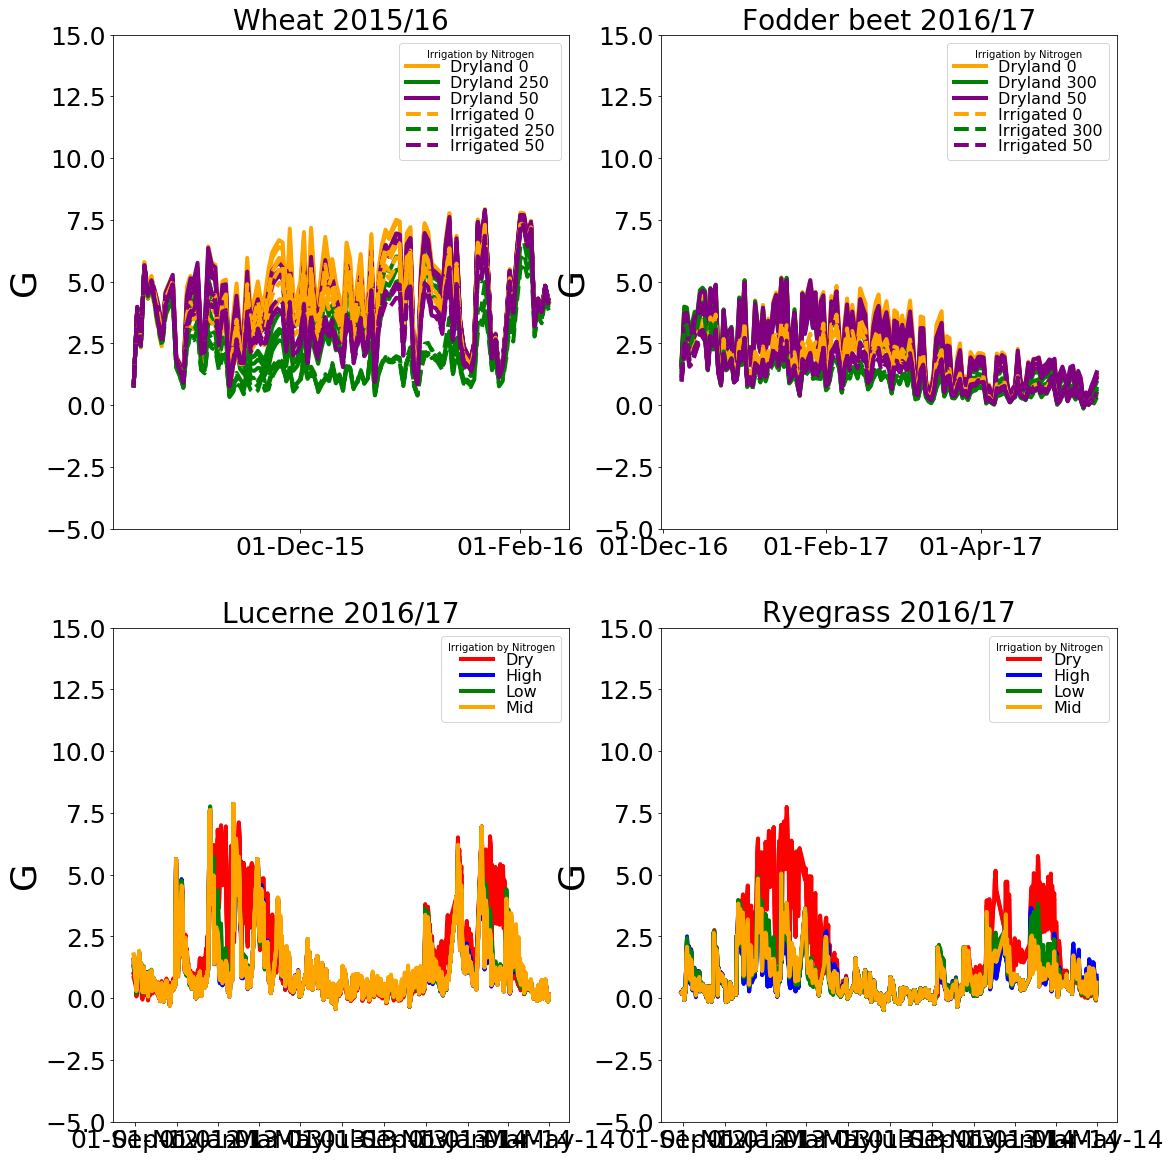

In [197]:
def AddGraphFeatures(Name):
    plt.ylabel('G',fontsize=36);
    plt.ylim(-5,15)
    plt.tick_params(labelsize=25)
    plt.title(Name, fontsize=28);
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
    labels, handles = GH.DedupLegendElements()
    ledg = plt.legend(labels, handles,loc=1,numpoints=1,fontsize = 16,labelspacing = 0.05, 
                              title='Irrigation by Nitrogen')

Graph = plt.figure(figsize=(18,20))

ax = Graph.add_subplot(2,2,1)
GH.AddIndexedPlot(G.loc[:,'Wheat'],ax,WheatGPs,4)
AddGraphFeatures('Wheat 2015/16')

ax = Graph.add_subplot(2,2,2)
GH.AddIndexedPlot(G.loc[:,'Beat'],ax,BeatGPs,4)
AddGraphFeatures('Fodder beet 2016/17')

ax = Graph.add_subplot(2,2,3)
GH.AddIndexedPlotSingleLevel(G.loc[:,'Lucerne'],ax,LandPGPs,4)
AddGraphFeatures('Lucerne 2016/17')

ax = Graph.add_subplot(2,2,4)
GH.AddIndexedPlotSingleLevel(G.loc[:,'Ryegrass'],ax,LandPGPs,4)
AddGraphFeatures('Ryegrass 2016/17')

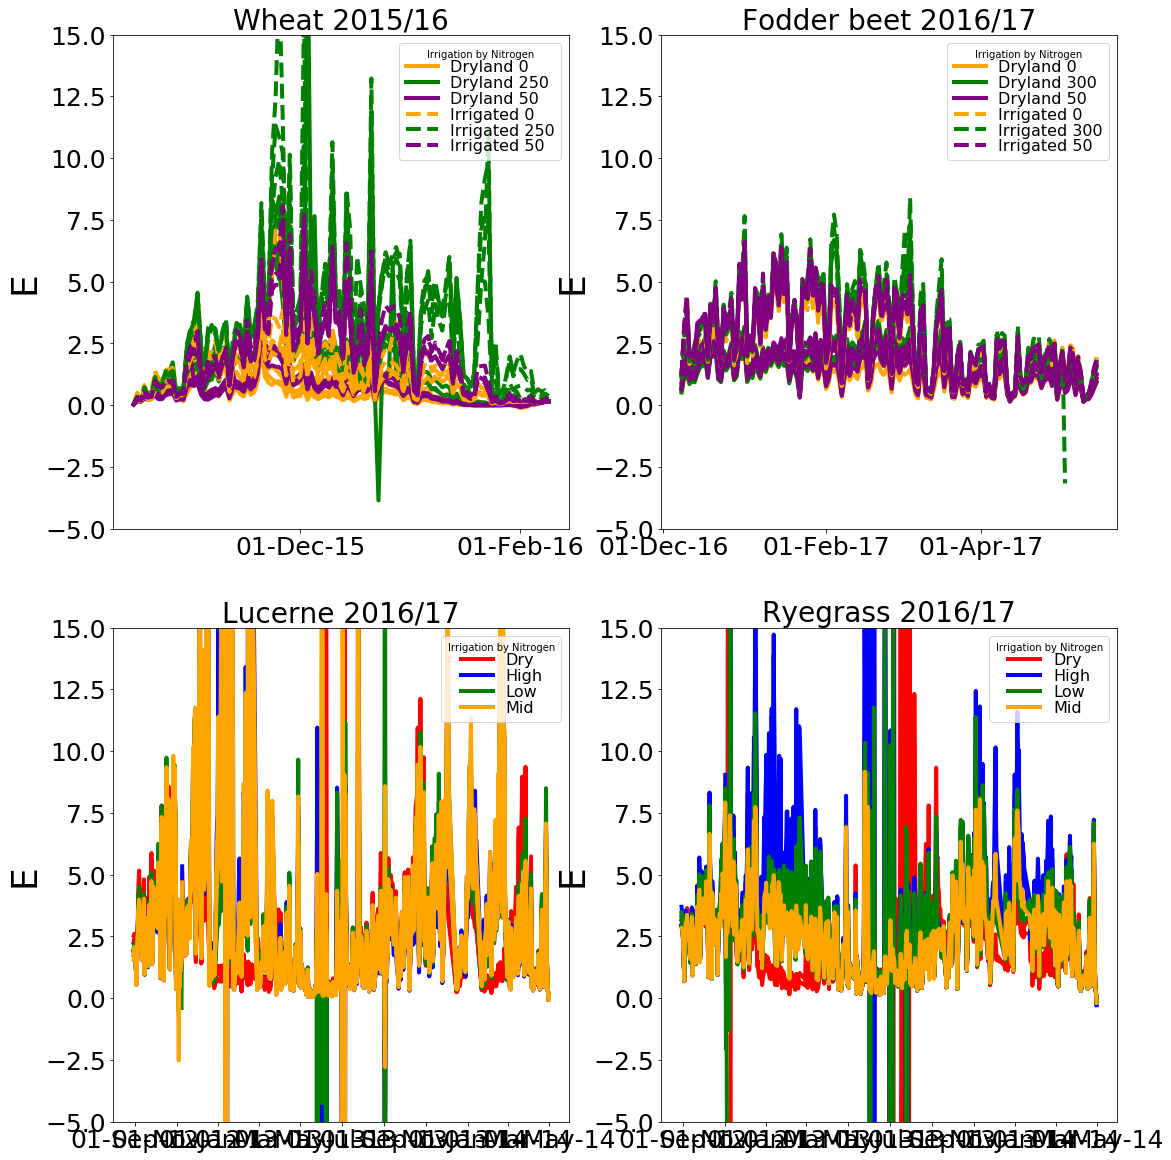

In [198]:
def AddGraphFeatures(Name):
    plt.ylabel('E',fontsize=36);
    plt.ylim(-5,15)
    plt.tick_params(labelsize=25)
    plt.title(Name, fontsize=28);
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
    labels, handles = GH.DedupLegendElements()
    ledg = plt.legend(labels, handles,loc=1,numpoints=1,fontsize = 16,labelspacing = 0.05, 
                              title='Irrigation by Nitrogen')

Graph = plt.figure(figsize=(18,20))

ax = Graph.add_subplot(2,2,1)
GH.AddIndexedPlot(E.loc[:,'Wheat'],ax,WheatGPs,4)
AddGraphFeatures('Wheat 2015/16')

ax = Graph.add_subplot(2,2,2)
GH.AddIndexedPlot(E.loc[:,'Beat'],ax,BeatGPs,4)
AddGraphFeatures('Fodder beet 2016/17')

ax = Graph.add_subplot(2,2,3)
GH.AddIndexedPlotSingleLevel(E.loc[:,'Lucerne'],ax,LandPGPs,4)
AddGraphFeatures('Lucerne 2016/17')

ax = Graph.add_subplot(2,2,4)
GH.AddIndexedPlotSingleLevel(E.loc[:,'Ryegrass'],ax,LandPGPs,4)
AddGraphFeatures('Ryegrass 2016/17')

In [ ]:
Graph = plt.figure(figsize=(18,10))
pos =  1
for crop in Crops:
        ax = Graph.add_subplot(1,2,pos)
        GH.AddIndexedXY(-WU.reindex(E.index).loc[:,crop],
                        E.loc[:,crop],
                        ax,globals()[crop+'GPs'], 10)
        plt.plot([0,10],[0,10],'k',lw=5)
        plt.xlabel('Water Balance, (mm/d)',fontsize=36)
        plt.ylabel('IR temp (mm/d)',fontsize=26)
        plt.tick_params(labelsize=25)
        plt.title(crop,fontsize=30)
        labels, handles = GH.DedupLegendElements()
        ledg = plt.legend(labels, handles,loc=2,numpoints=1,fontsize = 16,labelspacing = 0.05)
        ledg.get_title().set_fontsize(20)
        pos +=1
    